In [1]:
import pandas as pd

df = pd.read_csv('2015.csv')

In [2]:
#Select only the columns we wish to use
columns_tokeep = ['DIABETE3','BPHIGH4','BLOODCHO','TOLDHI2','_BMI5','SMOKE100','CVDSTRK3','CVDINFR4','PHYSHLTH','EXERANY2','FRUIT1','AVEDRNK2','DRNK3GE5','GENHLTH','MENTHLTH','DIFFWALK','SEX','_AGEG5YR','INCOME2']
clean_columns = df[columns_tokeep]
#print(len(clean_columns.columns))
#clean_columns.rename(columns={}, inplace=True)

In [3]:
#remove nulls from dataset
clean_nulls = clean_columns.dropna()
clean_nulls

,DIABETE3,BPHIGH4,BLOODCHO,TOLDHI2,_BMI5,SMOKE100,CVDSTRK3,CVDINFR4,PHYSHLTH,EXERANY2,FRUIT1,AVEDRNK2,DRNK3GE5,GENHLTH,MENTHLTH,DIFFWALK,SEX,_AGEG5YR,INCOME2
6,3.0,1.0,1.0,1.0,2389.0,2.0,2.0,2.0,88.0,1.0,202.0,1.0,88.0,2.0,3.0,2.0,2.0,11.0,4.0
15,3.0,1.0,1.0,1.0,2500.0,1.0,2.0,2.0,88.0,1.0,308.0,2.0,88.0,3.0,88.0,1.0,2.0,11.0,4.0
21,1.0,3.0,1.0,2.0,2468.0,1.0,2.0,2.0,88.0,1.0,320.0,1.0,88.0,3.0,88.0,2.0,1.0,13.0,8.0
31,3.0,3.0,1.0,2.0,2569.0,1.0,2.0,2.0,15.0,2.0,202.0,1.0,88.0,3.0,88.0,2.0,2.0,7.0,7.0
33,1.0,1.0,1.0,1.0,2850.0,2.0,2.0,2.0,88.0,2.0,305.0,1.0,88.0,4.0,88.0,1.0,2.0,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441435,3.0,3.0,1.0,1.0,2728.0,2.0,2.0,2.0,3.0,2.0,203.0,4.0,8.0,1.0,88.0,2.0,1.0,6.0,4.0
441437,3.0,3.0,1.0,1.0,2468.0,2.0,2.0,2.0,88.0,1.0,303.0,3.0,88.0,1.0,88.0,2.0,1.0,6.0,99.0
441447,3.0,3.0,1.0,1.0,3054.0,1.0,2.0,2.0,88.0,2.0,102.0,2.0,1.0,4.0,88.0,1.0,1.0,6.0,1.0
441448,3.0,1.0,1.0,2.0,4229.0,2.0,2.0,2.0,4.0,1.0,101.0,2.0,88.0,3.0,14.0,2.0,1.0,3.0,8.0


In [4]:
#0 diabete3 >6
#1 bphigh >6
#2 bloodcho >6
#3 toldhi2 >6
#4 _bmi5
#5 smoke100 >6
#6 cvdstrk3 >6
#7 cvdinfr4 >6
#8 physhlth =77 or =99 (88 is no days health not good)
#9 exerany2 >6
#10 fruit1 =777 or =999
#11 avedrnk2 =77 or =99
#12 drnk3ge5 =77 or ==99
#13 genhlth >6
#14 menthlth =77 or =99
#15 diffwalk >6
#16 sex
#17 _ageg5yr >13
#18 income2 =77 or =99
conditions = [
    clean_nulls[columns_tokeep[0]] >6,
    clean_nulls[columns_tokeep[1]] >6,
    clean_nulls[columns_tokeep[2]] >6,
    clean_nulls[columns_tokeep[3]] >6,
    clean_nulls[columns_tokeep[5]] >6,
    clean_nulls[columns_tokeep[6]] >6,
    clean_nulls[columns_tokeep[7]] >6,
    clean_nulls[columns_tokeep[8]] ==77,
    clean_nulls[columns_tokeep[8]] ==99,
    clean_nulls[columns_tokeep[9]] >6,
    clean_nulls[columns_tokeep[10]] ==777,
    clean_nulls[columns_tokeep[10]] ==999,
    clean_nulls[columns_tokeep[11]] ==77,
    clean_nulls[columns_tokeep[11]] ==99,
    clean_nulls[columns_tokeep[12]] ==77,
    clean_nulls[columns_tokeep[12]] ==99,
    clean_nulls[columns_tokeep[13]] >6,
    clean_nulls[columns_tokeep[14]] ==77,
    clean_nulls[columns_tokeep[14]] ==99,
    clean_nulls[columns_tokeep[15]] >6,
    clean_nulls[columns_tokeep[17]] >13,
    clean_nulls[columns_tokeep[18]] ==77,
    clean_nulls[columns_tokeep[18]] ==99
]

combined_condition = ~pd.DataFrame(conditions).any()
filtered_df = clean_nulls.copy()

# Filter out rows based on the combined condition
filtered_df = filtered_df[combined_condition]
filtered_df





,DIABETE3,BPHIGH4,BLOODCHO,TOLDHI2,_BMI5,SMOKE100,CVDSTRK3,CVDINFR4,PHYSHLTH,EXERANY2,FRUIT1,AVEDRNK2,DRNK3GE5,GENHLTH,MENTHLTH,DIFFWALK,SEX,_AGEG5YR,INCOME2
6,3.0,1.0,1.0,1.0,2389.0,2.0,2.0,2.0,88.0,1.0,202.0,1.0,88.0,2.0,3.0,2.0,2.0,11.0,4.0
15,3.0,1.0,1.0,1.0,2500.0,1.0,2.0,2.0,88.0,1.0,308.0,2.0,88.0,3.0,88.0,1.0,2.0,11.0,4.0
21,1.0,3.0,1.0,2.0,2468.0,1.0,2.0,2.0,88.0,1.0,320.0,1.0,88.0,3.0,88.0,2.0,1.0,13.0,8.0
31,3.0,3.0,1.0,2.0,2569.0,1.0,2.0,2.0,15.0,2.0,202.0,1.0,88.0,3.0,88.0,2.0,2.0,7.0,7.0
33,1.0,1.0,1.0,1.0,2850.0,2.0,2.0,2.0,88.0,2.0,305.0,1.0,88.0,4.0,88.0,1.0,2.0,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441431,3.0,1.0,1.0,1.0,2780.0,1.0,2.0,2.0,88.0,2.0,201.0,2.0,88.0,3.0,88.0,2.0,2.0,11.0,7.0
441435,3.0,3.0,1.0,1.0,2728.0,2.0,2.0,2.0,3.0,2.0,203.0,4.0,8.0,1.0,88.0,2.0,1.0,6.0,4.0
441447,3.0,3.0,1.0,1.0,3054.0,1.0,2.0,2.0,88.0,2.0,102.0,2.0,1.0,4.0,88.0,1.0,1.0,6.0,1.0
441448,3.0,1.0,1.0,2.0,4229.0,2.0,2.0,2.0,4.0,1.0,101.0,2.0,88.0,3.0,14.0,2.0,1.0,3.0,8.0


In [5]:
#Renaming all the colums we kept to inprove readability of our dataset.
filtered_df.rename(columns={'DIABETE3': 'Has_Diabetes',
                              'BPHIGH4': 'High_BP',
                              'BLOODCHO': 'Checked_Cho',
                              'TOLDHI2': 'Told_High_Cho',
                              '_BMI5': 'BMI',
                              'SMOKE100': 'Smoker',
                              'CVDSTRK3': 'Stroke',
                              'CVDINFR4': 'Heart_Attack',
                              'PHYSHLTH': 'Physical_Activity',
                              'EXERANY2': 'Recent_Exercise',
                              'FRUIT1': 'Eats_Fruit',
                              'AVEDRNK2': 'Avg_Drink',
                              'DRNK3GE5': '5_or_More_Drinks',
                              'GENHLTH': 'Gen_Health',
                              'MENTHLTH': 'Mental_Health',
                              'DIFFWALK': 'Diff_Walking',
                              'SEX': 'Sex',
                              '_AGEG5YR': 'Age',
                              'INCOME2': 'Income'}, inplace=True)
print(filtered_df)#printing dataset

        Has_Diabetes  High_BP  Checked_Cho  Told_High_Cho     BMI  Smoker  \
6                3.0      1.0          1.0            1.0  2389.0     2.0   
15               3.0      1.0          1.0            1.0  2500.0     1.0   
21               1.0      3.0          1.0            2.0  2468.0     1.0   
31               3.0      3.0          1.0            2.0  2569.0     1.0   
33               1.0      1.0          1.0            1.0  2850.0     2.0   
...              ...      ...          ...            ...     ...     ...   
441431           3.0      1.0          1.0            1.0  2780.0     1.0   
441435           3.0      3.0          1.0            1.0  2728.0     2.0   
441447           3.0      3.0          1.0            1.0  3054.0     1.0   
441448           3.0      1.0          1.0            2.0  4229.0     2.0   
441450           3.0      1.0          1.0            1.0  4500.0     2.0   

        Stroke  Heart_Attack  Physical_Activity  Recent_Exercise  Eats_Frui

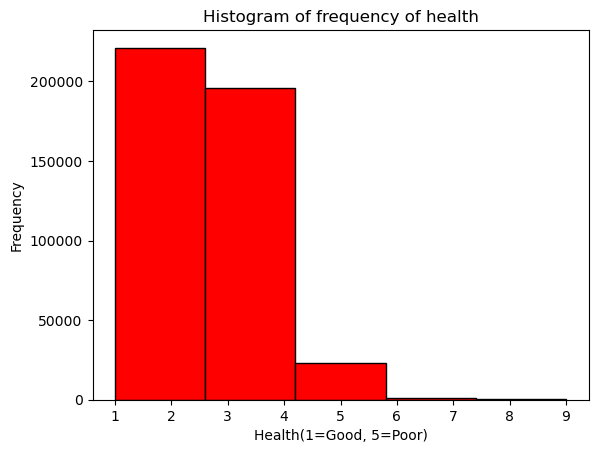

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('2015.csv')

#making histogram
plt.hist(data['GENHLTH'], bins=5, color='red', edgecolor='black')

#labels and title
plt.xlabel('Health(1=Good, 5=Poor)')
plt.ylabel('Frequency')
plt.title('Histogram of frequency of health')

plt.show()